## **Data Exploration**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [8]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [10]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [11]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [12]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [13]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [14]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [15]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [16]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [18]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=42)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

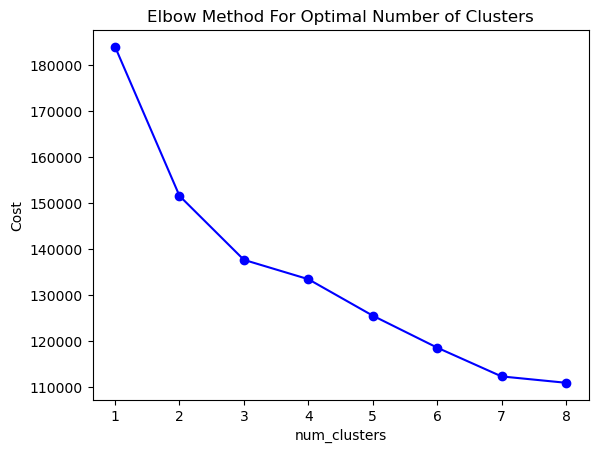

In [19]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [20]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


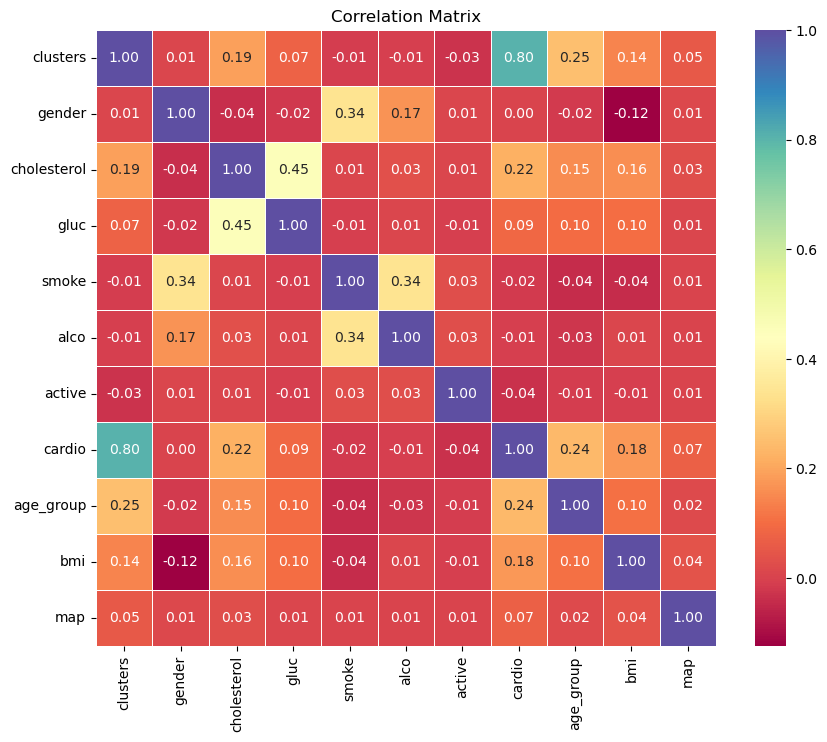

In [22]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

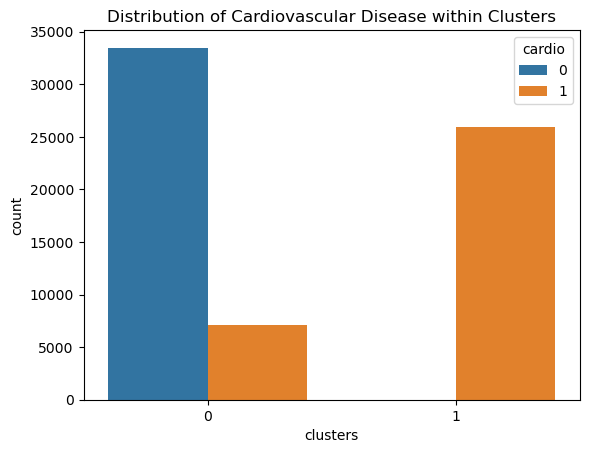

In [23]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [24]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [26]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [27]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [28]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.15818139 -0.50516664  1.10419015 ...  1.30964929 -0.3650416
  -0.14415617]
 [-0.79866399 -0.43630285 -0.38991224 ... -0.06864888 -0.45133283
  -0.10383417]
 [-0.78691661 -0.47215721 -0.30950719 ... -0.07042698 -0.53687898
  -0.0124744 ]
 ...
 [ 1.2317927   2.38762354 -0.39266425 ...  1.44552631  0.70322932
  -0.08374404]
 [-0.77701684 -0.43695475 -0.55457424 ... -0.86469947  0.50940889
  -0.28241916]
 [-0.74353741 -0.50875828 -0.23360877 ... -0.81412139 -0.63968314
  -0.19773984]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.35214055 -0.45991342 -0.27318789 ...  0.79700762  0.82428806
  -0.05209483]
 [ 1.03820678  0.99434928 -0.40291097 ...  0.68921623  0.56795818
  -0.08419126]
 [-0.85632044  2.35928334 -0.23717296 ... -0.58032182 -0.74886579
  -0.10195609]
 ...
 [ 1.29672246  1.11875407 -0.18636691 ...  0.66336297 -0.44930339
   0.01650267]
 [ 1.16285755 -0.43454719 -0.50918073 ...  1.19788566  0.41339235
  -0.13992175]
 [-0.83124847 -0.

In [29]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [31]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
       
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [32]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [33]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)
    print("Classification Report for RNN:")
    print(classification_report(final_true_labels, final_predicted_labels, digits=4))

rnn_model = RNNModel()
batch_size = 64
epochs = 150
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/150, Average Loss: 0.3641466964281018
Epoch 5/150, Average Loss: 0.16188511806968578
Epoch 10/150, Average Loss: 0.15102434593610012
Epoch 15/150, Average Loss: 0.1491009524468168
Epoch 20/150, Average Loss: 0.148468469931625
Epoch 25/150, Average Loss: 0.1478663825317594
Epoch 30/150, Average Loss: 0.14746845745022008
Epoch 35/150, Average Loss: 0.14744201327452666
Epoch 40/150, Average Loss: 0.14721153268374707
Epoch 45/150, Average Loss: 0.1470015308816373
Epoch 50/150, Average Loss: 0.14691854501087465
Epoch 55/150, Average Loss: 0.14677430145451387
Epoch 60/150, Average Loss: 0.1467030408704295
Epoch 65/150, Average Loss: 0.14662180566801963
Epoch 70/150, Average Loss: 0.14657495977310298
Epoch 75/150, Average Loss: 0.14662766390287604
Epoch 80/150, Average Loss: 0.1464647039050056
Epoch 85/150, Average Loss: 0.14641978256092847
Epoch 90/150, Average Loss: 0.14644257696245305
Epoch 95/150, Average Loss: 0.14643579378296825
Epoch 100/150, Average Loss: 0.1462039131105943
Ep

In [56]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


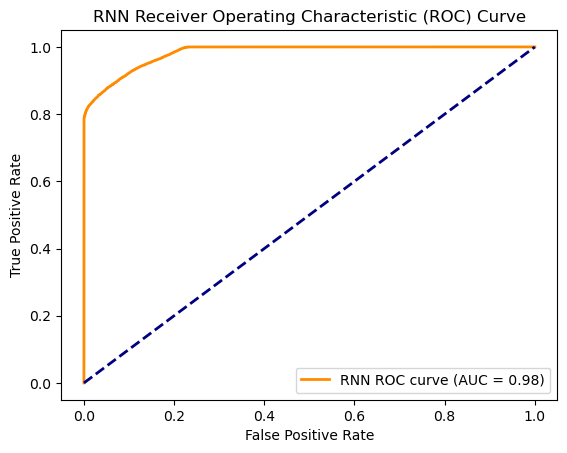

In [57]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [58]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
837/837 [==============================] - 0s 363us/step - loss: 0.3048 - accuracy: 0.8624
Epoch 2/50
837/837 [==============================] - 0s 356us/step - loss: 0.1580 - accuracy: 0.9060
Epoch 3/50
837/837 [==============================] - 0s 357us/step - loss: 0.1544 - accuracy: 0.9078
Epoch 4/50
837/837 [==============================] - 0s 359us/step - loss: 0.1520 - accuracy: 0.9092
Epoch 5/50
837/837 [==============================] - 0s 359us/step - loss: 0.1506 - accuracy: 0.9096
Epoch 6/50
837/837 [==============================] - 0s 357us/step - loss: 0.1491 - accuracy: 0.9098
Epoch 7/50
837/837 [==============================] - 0s 357us/step - loss: 0.1486 - accuracy: 0.9110
Epoch 8/50
837/837 [==============================] - 0s 357us/step - loss: 0.1482 - accuracy: 0.9106
Epoch 9/50
837/837 [==============================] - 0s 368us/step - loss: 0.1477 - accuracy: 0.9117
Epoch 10/50
837/837 [==============================] - 0s 358us/step - loss: 0.147

In [59]:
y_pred = kdnn_model.predict(x_train)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Classification Report for KDNN:")
print(classification_report(y_train, y_pred_binary,  digits=4))

1674/1674 [==============================] - 0s 238us/step
Classification Report for KDNN:
              precision    recall  f1-score   support

         0.0     0.8875    0.9499    0.9177     26824
         1.0     0.9460    0.8792    0.9114     26740

    accuracy                         0.9146     53564
   macro avg     0.9167    0.9146    0.9145     53564
weighted avg     0.9167    0.9146    0.9145     53564



419/419 [==============================] - 0s 240us/step


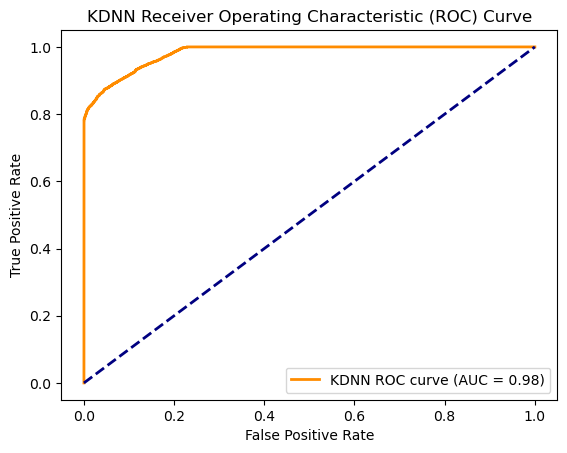

In [40]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [41]:
!pip install catboost
from catboost import CatBoostClassifier

In [42]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5540380	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.4534582	total: 70.7ms	remaining: 35.3s
2:	learn: 0.3785770	total: 76.4ms	remaining: 25.4s
3:	learn: 0.3257876	total: 81.6ms	remaining: 20.3s
4:	learn: 0.2884571	total: 86.5ms	remaining: 17.2s
5:	learn: 0.2582232	total: 91.2ms	remaining: 15.1s
6:	learn: 0.2339038	total: 96ms	remaining: 13.6s
7:	learn: 0.2164831	total: 101ms	remaining: 12.5s
8:	learn: 0.2023763	total: 107ms	remaining: 11.8s
9:	learn: 0.1951289	total: 111ms	remaining: 11s
10:	learn: 0.1875683	total: 117ms	remaining: 10.5s
11:	learn: 0.1812762	total: 122ms	remaining: 10.1s
12:	learn: 0.1769141	total: 127ms	remaining: 9.64s
13:	learn: 0.1732951	total: 133ms	remaining: 9.35s
14:	learn: 0.1695952	total: 138ms	remaining: 9.04s
15:	learn: 0.1666605	total: 142ms	remaining: 8.75s
16:	learn: 0.1651575	total: 149ms	remaining: 8.6s
17:	learn: 0.1630269	total: 153ms	remaining: 8.37s
18:	learn: 0.1614854	total: 158ms	remaining: 8.18s
19:	learn

182:	learn: 0.1443339	total: 1.01s	remaining: 4.49s
183:	learn: 0.1442925	total: 1.01s	remaining: 4.49s
184:	learn: 0.1442456	total: 1.02s	remaining: 4.49s
185:	learn: 0.1442067	total: 1.02s	remaining: 4.48s
186:	learn: 0.1441452	total: 1.03s	remaining: 4.47s
187:	learn: 0.1441058	total: 1.03s	remaining: 4.47s
188:	learn: 0.1440694	total: 1.04s	remaining: 4.46s
189:	learn: 0.1439801	total: 1.04s	remaining: 4.46s
190:	learn: 0.1439292	total: 1.05s	remaining: 4.45s
191:	learn: 0.1438885	total: 1.05s	remaining: 4.44s
192:	learn: 0.1438368	total: 1.06s	remaining: 4.43s
193:	learn: 0.1437751	total: 1.06s	remaining: 4.43s
194:	learn: 0.1437111	total: 1.07s	remaining: 4.42s
195:	learn: 0.1436794	total: 1.08s	remaining: 4.41s
196:	learn: 0.1436328	total: 1.08s	remaining: 4.41s
197:	learn: 0.1435868	total: 1.09s	remaining: 4.41s
198:	learn: 0.1435171	total: 1.09s	remaining: 4.4s
199:	learn: 0.1434530	total: 1.1s	remaining: 4.39s
200:	learn: 0.1434167	total: 1.1s	remaining: 4.39s
201:	learn: 0.1

373:	learn: 0.1353928	total: 2s	remaining: 3.35s
374:	learn: 0.1353565	total: 2.01s	remaining: 3.35s
375:	learn: 0.1353260	total: 2.01s	remaining: 3.34s
376:	learn: 0.1352864	total: 2.02s	remaining: 3.33s
377:	learn: 0.1352656	total: 2.02s	remaining: 3.33s
378:	learn: 0.1352200	total: 2.03s	remaining: 3.32s
379:	learn: 0.1351918	total: 2.03s	remaining: 3.32s
380:	learn: 0.1351423	total: 2.04s	remaining: 3.31s
381:	learn: 0.1351006	total: 2.04s	remaining: 3.31s
382:	learn: 0.1350693	total: 2.05s	remaining: 3.3s
383:	learn: 0.1350285	total: 2.06s	remaining: 3.3s
384:	learn: 0.1349963	total: 2.06s	remaining: 3.29s
385:	learn: 0.1349620	total: 2.07s	remaining: 3.29s
386:	learn: 0.1349233	total: 2.07s	remaining: 3.28s
387:	learn: 0.1348912	total: 2.08s	remaining: 3.28s
388:	learn: 0.1348555	total: 2.08s	remaining: 3.27s
389:	learn: 0.1348198	total: 2.09s	remaining: 3.26s
390:	learn: 0.1347476	total: 2.09s	remaining: 3.26s
391:	learn: 0.1347077	total: 2.1s	remaining: 3.25s
392:	learn: 0.1346

532:	learn: 0.1290192	total: 2.81s	remaining: 2.46s
533:	learn: 0.1289766	total: 2.82s	remaining: 2.46s
534:	learn: 0.1289360	total: 2.82s	remaining: 2.45s
535:	learn: 0.1288911	total: 2.83s	remaining: 2.45s
536:	learn: 0.1288567	total: 2.83s	remaining: 2.44s
537:	learn: 0.1288165	total: 2.84s	remaining: 2.44s
538:	learn: 0.1287765	total: 2.84s	remaining: 2.43s
539:	learn: 0.1287379	total: 2.85s	remaining: 2.43s
540:	learn: 0.1286996	total: 2.85s	remaining: 2.42s
541:	learn: 0.1286492	total: 2.86s	remaining: 2.42s
542:	learn: 0.1286167	total: 2.86s	remaining: 2.41s
543:	learn: 0.1285976	total: 2.87s	remaining: 2.4s
544:	learn: 0.1285345	total: 2.87s	remaining: 2.4s
545:	learn: 0.1284907	total: 2.88s	remaining: 2.39s
546:	learn: 0.1284494	total: 2.88s	remaining: 2.39s
547:	learn: 0.1284176	total: 2.89s	remaining: 2.38s
548:	learn: 0.1283579	total: 2.9s	remaining: 2.38s
549:	learn: 0.1283221	total: 2.9s	remaining: 2.37s
550:	learn: 0.1282890	total: 2.9s	remaining: 2.37s
551:	learn: 0.128

725:	learn: 0.1221384	total: 3.81s	remaining: 1.44s
726:	learn: 0.1221195	total: 3.82s	remaining: 1.43s
727:	learn: 0.1220860	total: 3.83s	remaining: 1.43s
728:	learn: 0.1220481	total: 3.83s	remaining: 1.42s
729:	learn: 0.1220119	total: 3.84s	remaining: 1.42s
730:	learn: 0.1219691	total: 3.84s	remaining: 1.41s
731:	learn: 0.1219452	total: 3.85s	remaining: 1.41s
732:	learn: 0.1219140	total: 3.85s	remaining: 1.4s
733:	learn: 0.1218854	total: 3.86s	remaining: 1.4s
734:	learn: 0.1218458	total: 3.87s	remaining: 1.39s
735:	learn: 0.1218026	total: 3.87s	remaining: 1.39s
736:	learn: 0.1217667	total: 3.87s	remaining: 1.38s
737:	learn: 0.1217432	total: 3.88s	remaining: 1.38s
738:	learn: 0.1216895	total: 3.88s	remaining: 1.37s
739:	learn: 0.1216598	total: 3.89s	remaining: 1.37s
740:	learn: 0.1216282	total: 3.9s	remaining: 1.36s
741:	learn: 0.1216005	total: 3.9s	remaining: 1.36s
742:	learn: 0.1215620	total: 3.9s	remaining: 1.35s
743:	learn: 0.1215167	total: 3.91s	remaining: 1.34s
744:	learn: 0.121

920:	learn: 0.1158136	total: 4.83s	remaining: 414ms
921:	learn: 0.1157565	total: 4.83s	remaining: 409ms
922:	learn: 0.1157393	total: 4.83s	remaining: 403ms
923:	learn: 0.1157039	total: 4.84s	remaining: 398ms
924:	learn: 0.1156894	total: 4.85s	remaining: 393ms
925:	learn: 0.1156572	total: 4.85s	remaining: 388ms
926:	learn: 0.1156382	total: 4.86s	remaining: 383ms
927:	learn: 0.1156089	total: 4.86s	remaining: 377ms
928:	learn: 0.1155860	total: 4.87s	remaining: 372ms
929:	learn: 0.1155575	total: 4.88s	remaining: 367ms
930:	learn: 0.1155230	total: 4.88s	remaining: 362ms
931:	learn: 0.1154845	total: 4.88s	remaining: 356ms
932:	learn: 0.1154548	total: 4.89s	remaining: 351ms
933:	learn: 0.1154235	total: 4.9s	remaining: 346ms
934:	learn: 0.1153996	total: 4.9s	remaining: 341ms
935:	learn: 0.1153801	total: 4.91s	remaining: 336ms
936:	learn: 0.1153528	total: 4.91s	remaining: 330ms
937:	learn: 0.1153247	total: 4.92s	remaining: 325ms
938:	learn: 0.1153011	total: 4.92s	remaining: 320ms
939:	learn: 0.

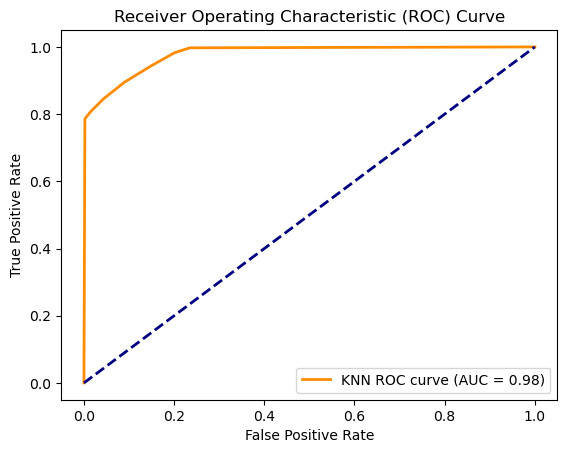

Decision Tree Metrics:
Accuracy: 0.9082
Precision: 0.9462
Recall: 0.8667
F1 Score: 0.9047
ROC AUC Score: 0.9084


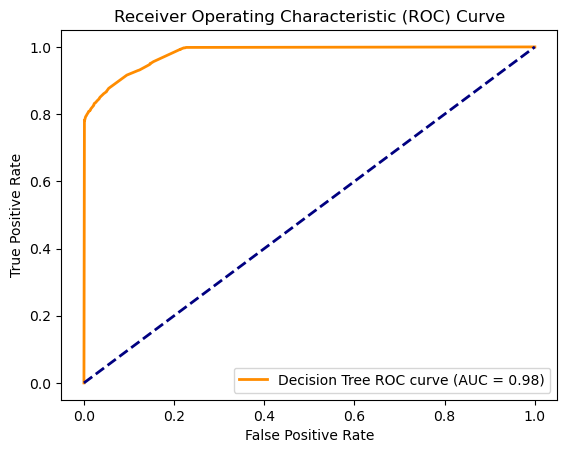

Random Forest Metrics:
Accuracy: 0.9088
Precision: 0.9367
Recall: 0.8782
F1 Score: 0.9065
ROC AUC Score: 0.9090


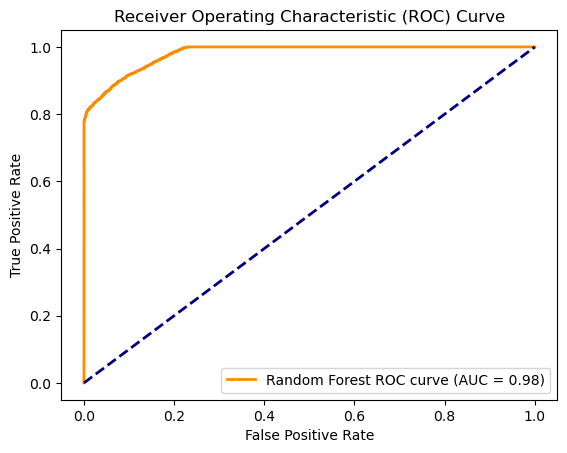

CatBoost Metrics:
Accuracy: 0.9070
Precision: 0.9260
Recall: 0.8859
F1 Score: 0.9055
ROC AUC Score: 0.9071


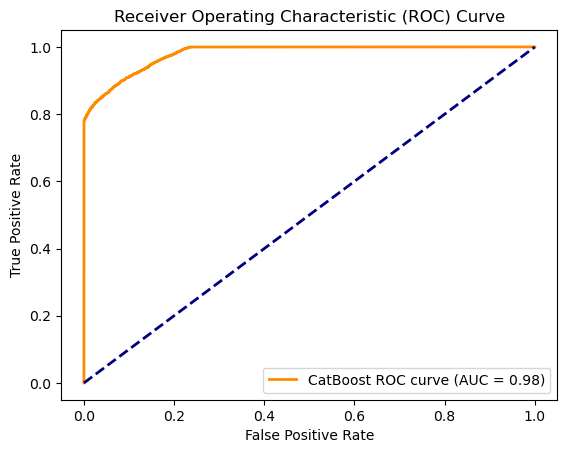

XGBoost Metrics:
Accuracy: 0.9088
Precision: 0.9354
Recall: 0.8795
F1 Score: 0.9066
ROC AUC Score: 0.9090


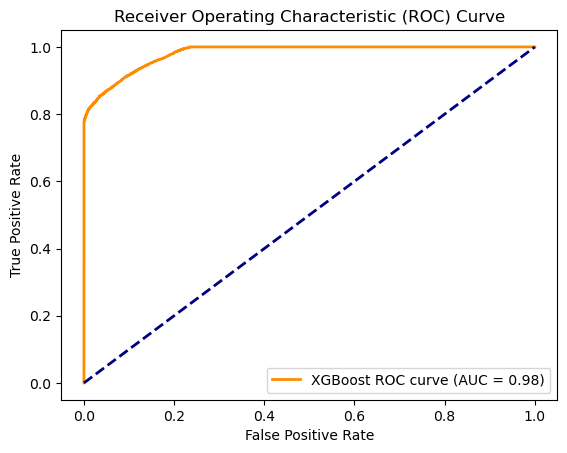

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [44]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5540380	total: 6.12ms	remaining: 6.12s
1:	learn: 0.4534582	total: 11.4ms	remaining: 5.71s
2:	learn: 0.3785770	total: 16.6ms	remaining: 5.51s
3:	learn: 0.3257876	total: 21.3ms	remaining: 5.32s
4:	learn: 0.2884571	total: 25.9ms	remaining: 5.16s
5:	learn: 0.2582232	total: 30.6ms	remaining: 5.08s
6:	learn: 0.2339038	total: 36ms	remaining: 5.11s
7:	learn: 0.2164831	total: 41ms	remaining: 5.09s
8:	learn: 0.2023763	total: 45.7ms	remaining: 5.03s
9:	learn: 0.1951289	total: 50.5ms	remaining: 5s
10:	learn: 0.1875683	total: 55.8ms	remaining: 5.02s
11:	learn: 0.1812762	total: 61ms	remaining: 5.02s
12:	learn: 0.1769141	total: 65.7ms	remaining: 4.99s
13:	learn: 0.1732951	total: 70.5ms	remaining: 4.96s
14:	learn: 0.1695952	total: 75.3ms	remaining: 4.95s
15:	learn: 0.1666605	total: 79.9ms	remaining: 4.91s
16:	learn: 0.1651575	total: 84.6ms	remaining: 4.89s
17:	learn: 0.1630269	total: 89.9ms	remaining: 4.91s
18:	learn: 0.1614854	total: 94.6ms	remaining: 4.89s
1

179:	learn: 0.1445274	total: 1000ms	remaining: 4.55s
180:	learn: 0.1444560	total: 1s	remaining: 4.55s
181:	learn: 0.1443896	total: 1.01s	remaining: 4.54s
182:	learn: 0.1443339	total: 1.01s	remaining: 4.53s
183:	learn: 0.1442925	total: 1.02s	remaining: 4.52s
184:	learn: 0.1442456	total: 1.02s	remaining: 4.52s
185:	learn: 0.1442067	total: 1.04s	remaining: 4.53s
186:	learn: 0.1441452	total: 1.05s	remaining: 4.55s
187:	learn: 0.1441058	total: 1.05s	remaining: 4.54s
188:	learn: 0.1440694	total: 1.06s	remaining: 4.54s
189:	learn: 0.1439801	total: 1.06s	remaining: 4.53s
190:	learn: 0.1439292	total: 1.07s	remaining: 4.52s
191:	learn: 0.1438885	total: 1.07s	remaining: 4.51s
192:	learn: 0.1438368	total: 1.08s	remaining: 4.5s
193:	learn: 0.1437751	total: 1.08s	remaining: 4.49s
194:	learn: 0.1437111	total: 1.09s	remaining: 4.49s
195:	learn: 0.1436794	total: 1.09s	remaining: 4.48s
196:	learn: 0.1436328	total: 1.1s	remaining: 4.47s
197:	learn: 0.1435868	total: 1.1s	remaining: 4.46s
198:	learn: 0.143

376:	learn: 0.1352864	total: 2.01s	remaining: 3.33s
377:	learn: 0.1352656	total: 2.02s	remaining: 3.32s
378:	learn: 0.1352200	total: 2.02s	remaining: 3.31s
379:	learn: 0.1351918	total: 2.03s	remaining: 3.31s
380:	learn: 0.1351423	total: 2.03s	remaining: 3.3s
381:	learn: 0.1351006	total: 2.04s	remaining: 3.3s
382:	learn: 0.1350693	total: 2.04s	remaining: 3.29s
383:	learn: 0.1350285	total: 2.05s	remaining: 3.29s
384:	learn: 0.1349963	total: 2.06s	remaining: 3.28s
385:	learn: 0.1349620	total: 2.06s	remaining: 3.28s
386:	learn: 0.1349233	total: 2.07s	remaining: 3.27s
387:	learn: 0.1348912	total: 2.07s	remaining: 3.27s
388:	learn: 0.1348555	total: 2.08s	remaining: 3.26s
389:	learn: 0.1348198	total: 2.08s	remaining: 3.26s
390:	learn: 0.1347476	total: 2.09s	remaining: 3.25s
391:	learn: 0.1347077	total: 2.09s	remaining: 3.25s
392:	learn: 0.1346763	total: 2.1s	remaining: 3.24s
393:	learn: 0.1346276	total: 2.1s	remaining: 3.23s
394:	learn: 0.1345593	total: 2.11s	remaining: 3.23s
395:	learn: 0.13

537:	learn: 0.1288165	total: 2.83s	remaining: 2.43s
538:	learn: 0.1287765	total: 2.83s	remaining: 2.42s
539:	learn: 0.1287379	total: 2.84s	remaining: 2.42s
540:	learn: 0.1286996	total: 2.84s	remaining: 2.41s
541:	learn: 0.1286492	total: 2.85s	remaining: 2.41s
542:	learn: 0.1286167	total: 2.85s	remaining: 2.4s
543:	learn: 0.1285976	total: 2.86s	remaining: 2.4s
544:	learn: 0.1285345	total: 2.87s	remaining: 2.39s
545:	learn: 0.1284907	total: 2.87s	remaining: 2.39s
546:	learn: 0.1284494	total: 2.88s	remaining: 2.38s
547:	learn: 0.1284176	total: 2.88s	remaining: 2.38s
548:	learn: 0.1283579	total: 2.89s	remaining: 2.37s
549:	learn: 0.1283221	total: 2.89s	remaining: 2.37s
550:	learn: 0.1282890	total: 2.9s	remaining: 2.36s
551:	learn: 0.1282654	total: 2.9s	remaining: 2.35s
552:	learn: 0.1282346	total: 2.91s	remaining: 2.35s
553:	learn: 0.1281824	total: 2.91s	remaining: 2.34s
554:	learn: 0.1281551	total: 2.92s	remaining: 2.34s
555:	learn: 0.1281110	total: 2.92s	remaining: 2.33s
556:	learn: 0.12

733:	learn: 0.1218854	total: 3.83s	remaining: 1.39s
734:	learn: 0.1218458	total: 3.84s	remaining: 1.38s
735:	learn: 0.1218026	total: 3.85s	remaining: 1.38s
736:	learn: 0.1217667	total: 3.85s	remaining: 1.37s
737:	learn: 0.1217432	total: 3.86s	remaining: 1.37s
738:	learn: 0.1216895	total: 3.86s	remaining: 1.36s
739:	learn: 0.1216598	total: 3.87s	remaining: 1.36s
740:	learn: 0.1216282	total: 3.88s	remaining: 1.35s
741:	learn: 0.1216005	total: 3.88s	remaining: 1.35s
742:	learn: 0.1215620	total: 3.88s	remaining: 1.34s
743:	learn: 0.1215167	total: 3.89s	remaining: 1.34s
744:	learn: 0.1214692	total: 3.89s	remaining: 1.33s
745:	learn: 0.1214429	total: 3.9s	remaining: 1.33s
746:	learn: 0.1213976	total: 3.9s	remaining: 1.32s
747:	learn: 0.1213635	total: 3.91s	remaining: 1.32s
748:	learn: 0.1213302	total: 3.91s	remaining: 1.31s
749:	learn: 0.1213118	total: 3.92s	remaining: 1.31s
750:	learn: 0.1212615	total: 3.92s	remaining: 1.3s
751:	learn: 0.1212172	total: 3.93s	remaining: 1.29s
752:	learn: 0.1

892:	learn: 0.1166548	total: 4.64s	remaining: 557ms
893:	learn: 0.1166189	total: 4.65s	remaining: 551ms
894:	learn: 0.1165742	total: 4.66s	remaining: 546ms
895:	learn: 0.1165528	total: 4.66s	remaining: 541ms
896:	learn: 0.1165228	total: 4.67s	remaining: 536ms
897:	learn: 0.1164914	total: 4.67s	remaining: 531ms
898:	learn: 0.1164592	total: 4.68s	remaining: 526ms
899:	learn: 0.1164279	total: 4.68s	remaining: 521ms
900:	learn: 0.1163813	total: 4.69s	remaining: 515ms
901:	learn: 0.1163602	total: 4.7s	remaining: 510ms
902:	learn: 0.1163304	total: 4.7s	remaining: 505ms
903:	learn: 0.1163078	total: 4.71s	remaining: 500ms
904:	learn: 0.1162833	total: 4.71s	remaining: 494ms
905:	learn: 0.1162588	total: 4.71s	remaining: 489ms
906:	learn: 0.1162179	total: 4.72s	remaining: 484ms
907:	learn: 0.1161890	total: 4.72s	remaining: 479ms
908:	learn: 0.1161608	total: 4.73s	remaining: 473ms
909:	learn: 0.1161286	total: 4.73s	remaining: 468ms
910:	learn: 0.1160995	total: 4.74s	remaining: 463ms
911:	learn: 0.

In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [60]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

Learning rate set to 0.041939
0:	learn: 0.5863344	total: 7.16ms	remaining: 7.16s
1:	learn: 0.5016742	total: 11ms	remaining: 5.49s
2:	learn: 0.4325997	total: 14.2ms	remaining: 4.71s
3:	learn: 0.3798720	total: 17.3ms	remaining: 4.32s
4:	learn: 0.3465489	total: 20.4ms	remaining: 4.07s
5:	learn: 0.3125078	total: 23.8ms	remaining: 3.94s
6:	learn: 0.2818133	total: 27.2ms	remaining: 3.86s
7:	learn: 0.2596762	total: 30.4ms	remaining: 3.77s
8:	learn: 0.2422902	total: 33.6ms	remaining: 3.7s
9:	learn: 0.2325093	total: 37ms	remaining: 3.66s
10:	learn: 0.2222889	total: 40.4ms	remaining: 3.63s
11:	learn: 0.2096853	total: 43.9ms	remaining: 3.61s
12:	learn: 0.2022779	total: 47.2ms	remaining: 3.58s
13:	learn: 0.1955880	total: 50.3ms	remaining: 3.54s
14:	learn: 0.1906421	total: 53.6ms	remaining: 3.52s
15:	learn: 0.1855841	total: 57.1ms	remaining: 3.51s
16:	learn: 0.1809269	total: 60.7ms	remaining: 3.51s
17:	learn: 0.1764464	total: 64ms	remaining: 3.49s
18:	learn: 0.1750832	total: 67.2ms	remaining: 3.47s

167:	learn: 0.1422244	total: 593ms	remaining: 2.94s
168:	learn: 0.1421479	total: 597ms	remaining: 2.93s
169:	learn: 0.1420882	total: 601ms	remaining: 2.94s
170:	learn: 0.1419561	total: 605ms	remaining: 2.93s
171:	learn: 0.1417793	total: 608ms	remaining: 2.93s
172:	learn: 0.1417190	total: 612ms	remaining: 2.92s
173:	learn: 0.1416510	total: 615ms	remaining: 2.92s
174:	learn: 0.1415675	total: 619ms	remaining: 2.92s
175:	learn: 0.1415223	total: 623ms	remaining: 2.92s
176:	learn: 0.1414419	total: 627ms	remaining: 2.92s
177:	learn: 0.1413855	total: 631ms	remaining: 2.91s
178:	learn: 0.1413246	total: 634ms	remaining: 2.91s
179:	learn: 0.1412670	total: 638ms	remaining: 2.9s
180:	learn: 0.1412157	total: 641ms	remaining: 2.9s
181:	learn: 0.1411727	total: 644ms	remaining: 2.89s
182:	learn: 0.1410826	total: 647ms	remaining: 2.89s
183:	learn: 0.1410007	total: 651ms	remaining: 2.88s
184:	learn: 0.1409096	total: 654ms	remaining: 2.88s
185:	learn: 0.1408569	total: 657ms	remaining: 2.88s
186:	learn: 0.

336:	learn: 0.1313011	total: 1.19s	remaining: 2.34s
337:	learn: 0.1312009	total: 1.2s	remaining: 2.34s
338:	learn: 0.1311468	total: 1.2s	remaining: 2.34s
339:	learn: 0.1310778	total: 1.2s	remaining: 2.33s
340:	learn: 0.1310123	total: 1.21s	remaining: 2.33s
341:	learn: 0.1309182	total: 1.21s	remaining: 2.33s
342:	learn: 0.1308603	total: 1.22s	remaining: 2.34s
343:	learn: 0.1308121	total: 1.23s	remaining: 2.34s
344:	learn: 0.1307468	total: 1.23s	remaining: 2.34s
345:	learn: 0.1306800	total: 1.24s	remaining: 2.34s
346:	learn: 0.1306233	total: 1.24s	remaining: 2.33s
347:	learn: 0.1305667	total: 1.24s	remaining: 2.33s
348:	learn: 0.1305097	total: 1.25s	remaining: 2.33s
349:	learn: 0.1303982	total: 1.25s	remaining: 2.33s
350:	learn: 0.1303385	total: 1.26s	remaining: 2.32s
351:	learn: 0.1302725	total: 1.26s	remaining: 2.32s
352:	learn: 0.1301941	total: 1.26s	remaining: 2.31s
353:	learn: 0.1301525	total: 1.27s	remaining: 2.31s
354:	learn: 0.1300924	total: 1.27s	remaining: 2.31s
355:	learn: 0.1

502:	learn: 0.1217542	total: 1.78s	remaining: 1.76s
503:	learn: 0.1217172	total: 1.79s	remaining: 1.76s
504:	learn: 0.1216710	total: 1.79s	remaining: 1.76s
505:	learn: 0.1216323	total: 1.79s	remaining: 1.75s
506:	learn: 0.1215935	total: 1.8s	remaining: 1.75s
507:	learn: 0.1215689	total: 1.8s	remaining: 1.75s
508:	learn: 0.1215097	total: 1.81s	remaining: 1.74s
509:	learn: 0.1214652	total: 1.81s	remaining: 1.74s
510:	learn: 0.1214073	total: 1.81s	remaining: 1.74s
511:	learn: 0.1213609	total: 1.82s	remaining: 1.73s
512:	learn: 0.1212654	total: 1.82s	remaining: 1.73s
513:	learn: 0.1212365	total: 1.82s	remaining: 1.73s
514:	learn: 0.1212069	total: 1.83s	remaining: 1.72s
515:	learn: 0.1211635	total: 1.83s	remaining: 1.72s
516:	learn: 0.1211180	total: 1.83s	remaining: 1.71s
517:	learn: 0.1210475	total: 1.84s	remaining: 1.71s
518:	learn: 0.1209895	total: 1.84s	remaining: 1.71s
519:	learn: 0.1209363	total: 1.84s	remaining: 1.7s
520:	learn: 0.1208711	total: 1.85s	remaining: 1.7s
521:	learn: 0.12

672:	learn: 0.1132090	total: 2.38s	remaining: 1.16s
673:	learn: 0.1131510	total: 2.38s	remaining: 1.15s
674:	learn: 0.1131102	total: 2.38s	remaining: 1.15s
675:	learn: 0.1130634	total: 2.39s	remaining: 1.15s
676:	learn: 0.1130383	total: 2.39s	remaining: 1.14s
677:	learn: 0.1129453	total: 2.4s	remaining: 1.14s
678:	learn: 0.1128747	total: 2.4s	remaining: 1.13s
679:	learn: 0.1128372	total: 2.4s	remaining: 1.13s
680:	learn: 0.1127724	total: 2.41s	remaining: 1.13s
681:	learn: 0.1127262	total: 2.41s	remaining: 1.12s
682:	learn: 0.1126833	total: 2.41s	remaining: 1.12s
683:	learn: 0.1126055	total: 2.42s	remaining: 1.12s
684:	learn: 0.1125567	total: 2.42s	remaining: 1.11s
685:	learn: 0.1125111	total: 2.42s	remaining: 1.11s
686:	learn: 0.1124491	total: 2.43s	remaining: 1.11s
687:	learn: 0.1123977	total: 2.43s	remaining: 1.1s
688:	learn: 0.1123431	total: 2.44s	remaining: 1.1s
689:	learn: 0.1122758	total: 2.44s	remaining: 1.1s
690:	learn: 0.1122281	total: 2.44s	remaining: 1.09s
691:	learn: 0.1121

839:	learn: 0.1057611	total: 2.97s	remaining: 566ms
840:	learn: 0.1057235	total: 2.97s	remaining: 562ms
841:	learn: 0.1056868	total: 2.98s	remaining: 559ms
842:	learn: 0.1056533	total: 2.98s	remaining: 555ms
843:	learn: 0.1056094	total: 2.98s	remaining: 552ms
844:	learn: 0.1055701	total: 2.99s	remaining: 548ms
845:	learn: 0.1055201	total: 2.99s	remaining: 545ms
846:	learn: 0.1054842	total: 3s	remaining: 541ms
847:	learn: 0.1054222	total: 3s	remaining: 538ms
848:	learn: 0.1053919	total: 3s	remaining: 534ms
849:	learn: 0.1053501	total: 3s	remaining: 530ms
850:	learn: 0.1052900	total: 3.01s	remaining: 527ms
851:	learn: 0.1052541	total: 3.01s	remaining: 523ms
852:	learn: 0.1051925	total: 3.02s	remaining: 520ms
853:	learn: 0.1051667	total: 3.02s	remaining: 516ms
854:	learn: 0.1051344	total: 3.02s	remaining: 513ms
855:	learn: 0.1050907	total: 3.03s	remaining: 509ms
856:	learn: 0.1050515	total: 3.03s	remaining: 506ms
857:	learn: 0.1050099	total: 3.03s	remaining: 502ms
858:	learn: 0.1049608	to

Learning rate set to 0.041939
0:	learn: 0.5889671	total: 4.56ms	remaining: 4.56s
1:	learn: 0.4997462	total: 8.35ms	remaining: 4.17s
2:	learn: 0.4370817	total: 12ms	remaining: 3.99s
3:	learn: 0.3913602	total: 15.7ms	remaining: 3.92s
4:	learn: 0.3554238	total: 19.5ms	remaining: 3.88s
5:	learn: 0.3229992	total: 23ms	remaining: 3.82s
6:	learn: 0.2950852	total: 26.8ms	remaining: 3.81s
7:	learn: 0.2674226	total: 30.6ms	remaining: 3.79s
8:	learn: 0.2460675	total: 34.1ms	remaining: 3.76s
9:	learn: 0.2340829	total: 37.8ms	remaining: 3.74s
10:	learn: 0.2265182	total: 41.3ms	remaining: 3.72s
11:	learn: 0.2181329	total: 44.9ms	remaining: 3.7s
12:	learn: 0.2102506	total: 48.8ms	remaining: 3.71s
13:	learn: 0.2034585	total: 52ms	remaining: 3.66s
14:	learn: 0.1952539	total: 55.3ms	remaining: 3.63s
15:	learn: 0.1903779	total: 58.8ms	remaining: 3.62s
16:	learn: 0.1865487	total: 61.9ms	remaining: 3.58s
17:	learn: 0.1824410	total: 65ms	remaining: 3.54s
18:	learn: 0.1791765	total: 68.8ms	remaining: 3.55s
1

168:	learn: 0.1460021	total: 597ms	remaining: 2.93s
169:	learn: 0.1459455	total: 600ms	remaining: 2.93s
170:	learn: 0.1458643	total: 603ms	remaining: 2.92s
171:	learn: 0.1457783	total: 606ms	remaining: 2.92s
172:	learn: 0.1457236	total: 610ms	remaining: 2.92s
173:	learn: 0.1456837	total: 613ms	remaining: 2.91s
174:	learn: 0.1456034	total: 617ms	remaining: 2.91s
175:	learn: 0.1455626	total: 621ms	remaining: 2.91s
176:	learn: 0.1454909	total: 624ms	remaining: 2.9s
177:	learn: 0.1454329	total: 628ms	remaining: 2.9s
178:	learn: 0.1453680	total: 632ms	remaining: 2.9s
179:	learn: 0.1453322	total: 636ms	remaining: 2.9s
180:	learn: 0.1452576	total: 640ms	remaining: 2.89s
181:	learn: 0.1451891	total: 643ms	remaining: 2.89s
182:	learn: 0.1451277	total: 647ms	remaining: 2.89s
183:	learn: 0.1450875	total: 652ms	remaining: 2.89s
184:	learn: 0.1450272	total: 656ms	remaining: 2.89s
185:	learn: 0.1449517	total: 660ms	remaining: 2.89s
186:	learn: 0.1448853	total: 664ms	remaining: 2.88s
187:	learn: 0.14

339:	learn: 0.1347952	total: 1.19s	remaining: 2.32s
340:	learn: 0.1347401	total: 1.2s	remaining: 2.31s
341:	learn: 0.1346278	total: 1.2s	remaining: 2.31s
342:	learn: 0.1345366	total: 1.2s	remaining: 2.3s
343:	learn: 0.1344770	total: 1.21s	remaining: 2.31s
344:	learn: 0.1343981	total: 1.22s	remaining: 2.32s
345:	learn: 0.1343417	total: 1.23s	remaining: 2.32s
346:	learn: 0.1342833	total: 1.23s	remaining: 2.32s
347:	learn: 0.1342135	total: 1.24s	remaining: 2.32s
348:	learn: 0.1341277	total: 1.24s	remaining: 2.31s
349:	learn: 0.1340777	total: 1.24s	remaining: 2.31s
350:	learn: 0.1340104	total: 1.25s	remaining: 2.31s
351:	learn: 0.1339771	total: 1.25s	remaining: 2.3s
352:	learn: 0.1339031	total: 1.25s	remaining: 2.3s
353:	learn: 0.1338738	total: 1.26s	remaining: 2.3s
354:	learn: 0.1338019	total: 1.26s	remaining: 2.29s
355:	learn: 0.1337582	total: 1.26s	remaining: 2.29s
356:	learn: 0.1337132	total: 1.27s	remaining: 2.29s
357:	learn: 0.1336737	total: 1.27s	remaining: 2.28s
358:	learn: 0.13362

503:	learn: 0.1254826	total: 1.79s	remaining: 1.76s
504:	learn: 0.1254171	total: 1.79s	remaining: 1.76s
505:	learn: 0.1253574	total: 1.8s	remaining: 1.75s
506:	learn: 0.1252969	total: 1.8s	remaining: 1.75s
507:	learn: 0.1252582	total: 1.8s	remaining: 1.75s
508:	learn: 0.1251894	total: 1.81s	remaining: 1.74s
509:	learn: 0.1251450	total: 1.81s	remaining: 1.74s
510:	learn: 0.1250948	total: 1.81s	remaining: 1.74s
511:	learn: 0.1250434	total: 1.82s	remaining: 1.73s
512:	learn: 0.1250039	total: 1.82s	remaining: 1.73s
513:	learn: 0.1249430	total: 1.82s	remaining: 1.73s
514:	learn: 0.1248478	total: 1.83s	remaining: 1.72s
515:	learn: 0.1248032	total: 1.83s	remaining: 1.72s
516:	learn: 0.1247382	total: 1.83s	remaining: 1.71s
517:	learn: 0.1246775	total: 1.84s	remaining: 1.71s
518:	learn: 0.1246121	total: 1.84s	remaining: 1.71s
519:	learn: 0.1245499	total: 1.84s	remaining: 1.7s
520:	learn: 0.1245091	total: 1.85s	remaining: 1.7s
521:	learn: 0.1244437	total: 1.85s	remaining: 1.7s
522:	learn: 0.1244

673:	learn: 0.1169838	total: 2.39s	remaining: 1.16s
674:	learn: 0.1169478	total: 2.39s	remaining: 1.15s
675:	learn: 0.1169102	total: 2.4s	remaining: 1.15s
676:	learn: 0.1168467	total: 2.4s	remaining: 1.14s
677:	learn: 0.1168114	total: 2.4s	remaining: 1.14s
678:	learn: 0.1167739	total: 2.4s	remaining: 1.14s
679:	learn: 0.1167318	total: 2.41s	remaining: 1.13s
680:	learn: 0.1166750	total: 2.42s	remaining: 1.13s
681:	learn: 0.1166313	total: 2.43s	remaining: 1.13s
682:	learn: 0.1165954	total: 2.44s	remaining: 1.13s
683:	learn: 0.1165526	total: 2.44s	remaining: 1.13s
684:	learn: 0.1165142	total: 2.44s	remaining: 1.12s
685:	learn: 0.1164781	total: 2.45s	remaining: 1.12s
686:	learn: 0.1164152	total: 2.45s	remaining: 1.12s
687:	learn: 0.1163398	total: 2.45s	remaining: 1.11s
688:	learn: 0.1163119	total: 2.46s	remaining: 1.11s
689:	learn: 0.1162709	total: 2.46s	remaining: 1.1s
690:	learn: 0.1162389	total: 2.46s	remaining: 1.1s
691:	learn: 0.1162011	total: 2.47s	remaining: 1.1s
692:	learn: 0.11615

839:	learn: 0.1098272	total: 2.99s	remaining: 569ms
840:	learn: 0.1097891	total: 2.99s	remaining: 566ms
841:	learn: 0.1097512	total: 3s	remaining: 562ms
842:	learn: 0.1097046	total: 3s	remaining: 559ms
843:	learn: 0.1096546	total: 3s	remaining: 555ms
844:	learn: 0.1095997	total: 3.01s	remaining: 552ms
845:	learn: 0.1095688	total: 3.01s	remaining: 548ms
846:	learn: 0.1095290	total: 3.01s	remaining: 545ms
847:	learn: 0.1094648	total: 3.02s	remaining: 541ms
848:	learn: 0.1094201	total: 3.02s	remaining: 537ms
849:	learn: 0.1093750	total: 3.02s	remaining: 534ms
850:	learn: 0.1093375	total: 3.03s	remaining: 530ms
851:	learn: 0.1093102	total: 3.03s	remaining: 527ms
852:	learn: 0.1092574	total: 3.04s	remaining: 523ms
853:	learn: 0.1092203	total: 3.04s	remaining: 520ms
854:	learn: 0.1092030	total: 3.04s	remaining: 516ms
855:	learn: 0.1091648	total: 3.05s	remaining: 513ms
856:	learn: 0.1090967	total: 3.05s	remaining: 509ms
857:	learn: 0.1090778	total: 3.05s	remaining: 505ms
858:	learn: 0.1090289

837/837 [==============================] - 0s 243us/step
Learning rate set to 0.056385
0:	learn: 0.5540380	total: 6.45ms	remaining: 6.44s
1:	learn: 0.4534582	total: 11.6ms	remaining: 5.77s
2:	learn: 0.3785770	total: 16.3ms	remaining: 5.42s
3:	learn: 0.3257876	total: 21.2ms	remaining: 5.27s
4:	learn: 0.2884571	total: 25.7ms	remaining: 5.11s
5:	learn: 0.2582232	total: 30.4ms	remaining: 5.03s
6:	learn: 0.2339038	total: 35.5ms	remaining: 5.04s
7:	learn: 0.2164831	total: 40.9ms	remaining: 5.07s
8:	learn: 0.2023763	total: 45.9ms	remaining: 5.05s
9:	learn: 0.1951289	total: 50.9ms	remaining: 5.04s
10:	learn: 0.1875683	total: 55.7ms	remaining: 5.01s
11:	learn: 0.1812762	total: 60.4ms	remaining: 4.97s
12:	learn: 0.1769141	total: 64.9ms	remaining: 4.93s
13:	learn: 0.1732951	total: 69.8ms	remaining: 4.92s
14:	learn: 0.1695952	total: 75.9ms	remaining: 4.98s
15:	learn: 0.1666605	total: 81.4ms	remaining: 5s
16:	learn: 0.1651575	total: 86ms	remaining: 4.97s
17:	learn: 0.1630269	total: 90.7ms	remaining

188:	learn: 0.1440694	total: 997ms	remaining: 4.28s
189:	learn: 0.1439801	total: 1s	remaining: 4.27s
190:	learn: 0.1439292	total: 1.01s	remaining: 4.26s
191:	learn: 0.1438885	total: 1.01s	remaining: 4.26s
192:	learn: 0.1438368	total: 1.02s	remaining: 4.26s
193:	learn: 0.1437751	total: 1.02s	remaining: 4.25s
194:	learn: 0.1437111	total: 1.03s	remaining: 4.25s
195:	learn: 0.1436794	total: 1.04s	remaining: 4.25s
196:	learn: 0.1436328	total: 1.04s	remaining: 4.25s
197:	learn: 0.1435868	total: 1.05s	remaining: 4.24s
198:	learn: 0.1435171	total: 1.05s	remaining: 4.24s
199:	learn: 0.1434530	total: 1.06s	remaining: 4.23s
200:	learn: 0.1434167	total: 1.06s	remaining: 4.23s
201:	learn: 0.1433722	total: 1.07s	remaining: 4.22s
202:	learn: 0.1433252	total: 1.07s	remaining: 4.22s
203:	learn: 0.1432914	total: 1.08s	remaining: 4.21s
204:	learn: 0.1432510	total: 1.08s	remaining: 4.21s
205:	learn: 0.1431860	total: 1.09s	remaining: 4.2s
206:	learn: 0.1431466	total: 1.09s	remaining: 4.2s
207:	learn: 0.143

380:	learn: 0.1351423	total: 2s	remaining: 3.25s
381:	learn: 0.1351006	total: 2.01s	remaining: 3.25s
382:	learn: 0.1350693	total: 2.01s	remaining: 3.24s
383:	learn: 0.1350285	total: 2.02s	remaining: 3.24s
384:	learn: 0.1349963	total: 2.02s	remaining: 3.24s
385:	learn: 0.1349620	total: 2.03s	remaining: 3.23s
386:	learn: 0.1349233	total: 2.04s	remaining: 3.23s
387:	learn: 0.1348912	total: 2.04s	remaining: 3.22s
388:	learn: 0.1348555	total: 2.05s	remaining: 3.21s
389:	learn: 0.1348198	total: 2.05s	remaining: 3.21s
390:	learn: 0.1347476	total: 2.06s	remaining: 3.2s
391:	learn: 0.1347077	total: 2.06s	remaining: 3.2s
392:	learn: 0.1346763	total: 2.07s	remaining: 3.19s
393:	learn: 0.1346276	total: 2.07s	remaining: 3.19s
394:	learn: 0.1345593	total: 2.08s	remaining: 3.18s
395:	learn: 0.1345096	total: 2.08s	remaining: 3.18s
396:	learn: 0.1344833	total: 2.09s	remaining: 3.17s
397:	learn: 0.1344432	total: 2.09s	remaining: 3.17s
398:	learn: 0.1344154	total: 2.1s	remaining: 3.16s
399:	learn: 0.1343

573:	learn: 0.1274467	total: 3s	remaining: 2.23s
574:	learn: 0.1273942	total: 3.01s	remaining: 2.23s
575:	learn: 0.1273476	total: 3.02s	remaining: 2.22s
576:	learn: 0.1273140	total: 3.02s	remaining: 2.21s
577:	learn: 0.1272752	total: 3.02s	remaining: 2.21s
578:	learn: 0.1272372	total: 3.03s	remaining: 2.2s
579:	learn: 0.1271998	total: 3.04s	remaining: 2.2s
580:	learn: 0.1271506	total: 3.04s	remaining: 2.19s
581:	learn: 0.1271101	total: 3.05s	remaining: 2.19s
582:	learn: 0.1270792	total: 3.05s	remaining: 2.18s
583:	learn: 0.1270438	total: 3.06s	remaining: 2.18s
584:	learn: 0.1270046	total: 3.06s	remaining: 2.17s
585:	learn: 0.1269652	total: 3.07s	remaining: 2.17s
586:	learn: 0.1269317	total: 3.07s	remaining: 2.16s
587:	learn: 0.1269043	total: 3.08s	remaining: 2.16s
588:	learn: 0.1268802	total: 3.08s	remaining: 2.15s
589:	learn: 0.1268471	total: 3.09s	remaining: 2.15s
590:	learn: 0.1268070	total: 3.1s	remaining: 2.14s
591:	learn: 0.1267669	total: 3.1s	remaining: 2.14s
592:	learn: 0.12673

769:	learn: 0.1205956	total: 4.01s	remaining: 1.2s
770:	learn: 0.1205569	total: 4.01s	remaining: 1.19s
771:	learn: 0.1205251	total: 4.02s	remaining: 1.19s
772:	learn: 0.1204789	total: 4.02s	remaining: 1.18s
773:	learn: 0.1204427	total: 4.04s	remaining: 1.18s
774:	learn: 0.1204148	total: 4.05s	remaining: 1.17s
775:	learn: 0.1203740	total: 4.05s	remaining: 1.17s
776:	learn: 0.1203295	total: 4.06s	remaining: 1.16s
777:	learn: 0.1202990	total: 4.06s	remaining: 1.16s
778:	learn: 0.1202732	total: 4.07s	remaining: 1.15s
779:	learn: 0.1202431	total: 4.07s	remaining: 1.15s
780:	learn: 0.1202044	total: 4.08s	remaining: 1.14s
781:	learn: 0.1201632	total: 4.08s	remaining: 1.14s
782:	learn: 0.1201434	total: 4.09s	remaining: 1.13s
783:	learn: 0.1201091	total: 4.09s	remaining: 1.13s
784:	learn: 0.1200723	total: 4.1s	remaining: 1.12s
785:	learn: 0.1200391	total: 4.1s	remaining: 1.12s
786:	learn: 0.1200062	total: 4.11s	remaining: 1.11s
787:	learn: 0.1199734	total: 4.11s	remaining: 1.11s
788:	learn: 0.1

962:	learn: 0.1145774	total: 5.01s	remaining: 192ms
963:	learn: 0.1145453	total: 5.01s	remaining: 187ms
964:	learn: 0.1145167	total: 5.02s	remaining: 182ms
965:	learn: 0.1144857	total: 5.02s	remaining: 177ms
966:	learn: 0.1144597	total: 5.03s	remaining: 172ms
967:	learn: 0.1144167	total: 5.03s	remaining: 166ms
968:	learn: 0.1143887	total: 5.04s	remaining: 161ms
969:	learn: 0.1143588	total: 5.04s	remaining: 156ms
970:	learn: 0.1143397	total: 5.05s	remaining: 151ms
971:	learn: 0.1143151	total: 5.05s	remaining: 146ms
972:	learn: 0.1142861	total: 5.06s	remaining: 140ms
973:	learn: 0.1142548	total: 5.06s	remaining: 135ms
974:	learn: 0.1142243	total: 5.07s	remaining: 130ms
975:	learn: 0.1141972	total: 5.07s	remaining: 125ms
976:	learn: 0.1141602	total: 5.08s	remaining: 120ms
977:	learn: 0.1141310	total: 5.08s	remaining: 114ms
978:	learn: 0.1140988	total: 5.09s	remaining: 109ms
979:	learn: 0.1140723	total: 5.09s	remaining: 104ms
980:	learn: 0.1140468	total: 5.1s	remaining: 98.7ms
981:	learn: 

## **ROC Curve and Confusion Matrix for ML Ensemble**

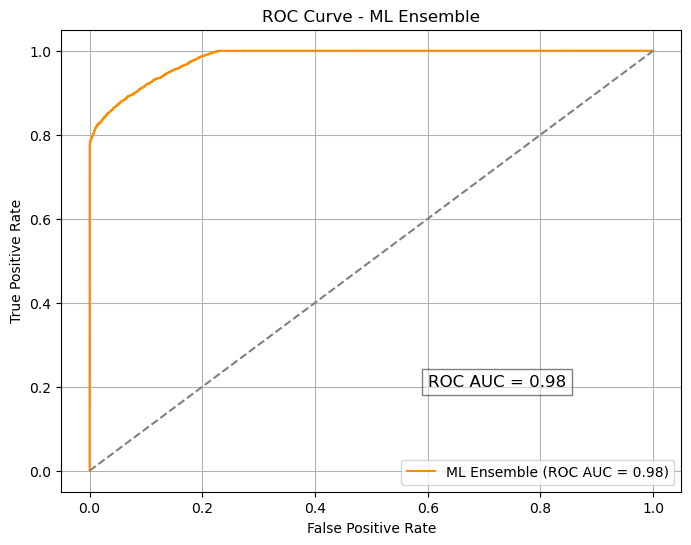

<Figure size 800x600 with 0 Axes>

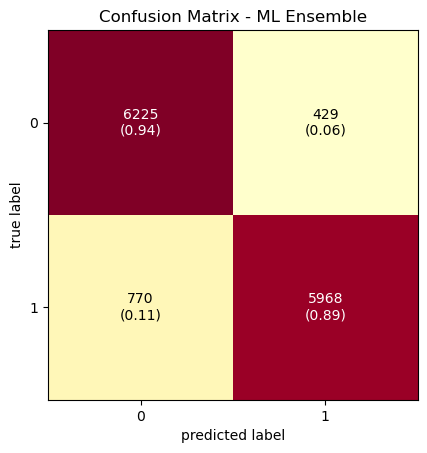

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

419/419 [==============================] - 0s 289us/step


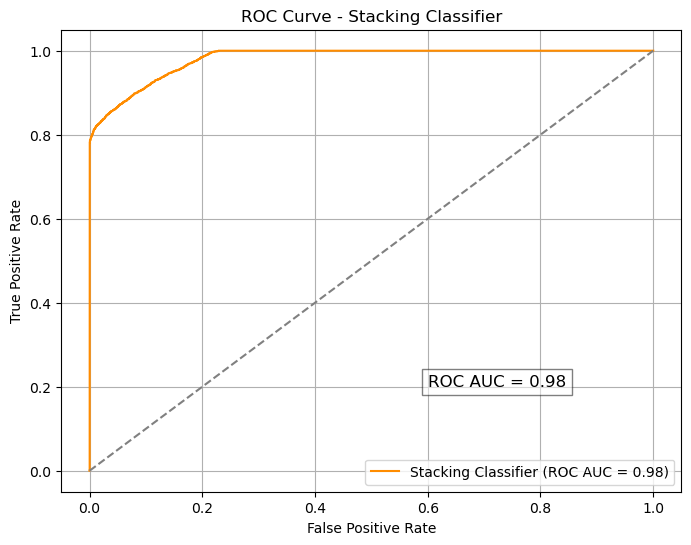

<Figure size 800x600 with 0 Axes>

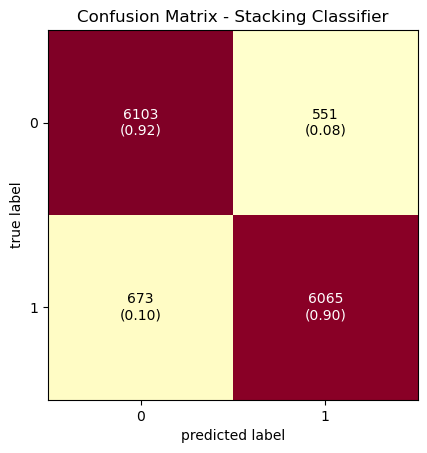

In [48]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


## ALL ENSEMBLE

In [49]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

Learning rate set to 0.056385
0:	learn: 0.5540380	total: 5.91ms	remaining: 5.91s
1:	learn: 0.4534582	total: 10.8ms	remaining: 5.39s
2:	learn: 0.3785770	total: 15.6ms	remaining: 5.17s
3:	learn: 0.3257876	total: 20.5ms	remaining: 5.1s
4:	learn: 0.2884571	total: 25.3ms	remaining: 5.04s
5:	learn: 0.2582232	total: 29.9ms	remaining: 4.96s
6:	learn: 0.2339038	total: 35ms	remaining: 4.96s
7:	learn: 0.2164831	total: 40.8ms	remaining: 5.05s
8:	learn: 0.2023763	total: 45.5ms	remaining: 5.01s
9:	learn: 0.1951289	total: 50.2ms	remaining: 4.97s
10:	learn: 0.1875683	total: 54.8ms	remaining: 4.93s
11:	learn: 0.1812762	total: 59.9ms	remaining: 4.93s
12:	learn: 0.1769141	total: 64.6ms	remaining: 4.91s
13:	learn: 0.1732951	total: 69.3ms	remaining: 4.88s
14:	learn: 0.1695952	total: 73.8ms	remaining: 4.84s
15:	learn: 0.1666605	total: 78.3ms	remaining: 4.82s
16:	learn: 0.1651575	total: 84ms	remaining: 4.86s
17:	learn: 0.1630269	total: 88.6ms	remaining: 4.83s
18:	learn: 0.1614854	total: 93.9ms	remaining: 4.8

199:	learn: 0.1434530	total: 1.01s	remaining: 4.04s
200:	learn: 0.1434167	total: 1.02s	remaining: 4.04s
201:	learn: 0.1433722	total: 1.02s	remaining: 4.04s
202:	learn: 0.1433252	total: 1.03s	remaining: 4.03s
203:	learn: 0.1432914	total: 1.03s	remaining: 4.02s
204:	learn: 0.1432510	total: 1.03s	remaining: 4.02s
205:	learn: 0.1431860	total: 1.04s	remaining: 4.01s
206:	learn: 0.1431466	total: 1.04s	remaining: 4s
207:	learn: 0.1430892	total: 1.05s	remaining: 4s
208:	learn: 0.1430529	total: 1.05s	remaining: 3.99s
209:	learn: 0.1430049	total: 1.06s	remaining: 3.99s
210:	learn: 0.1429473	total: 1.07s	remaining: 3.99s
211:	learn: 0.1428856	total: 1.07s	remaining: 3.98s
212:	learn: 0.1428446	total: 1.08s	remaining: 3.98s
213:	learn: 0.1427977	total: 1.08s	remaining: 3.97s
214:	learn: 0.1427658	total: 1.09s	remaining: 3.97s
215:	learn: 0.1427352	total: 1.09s	remaining: 3.96s
216:	learn: 0.1426687	total: 1.1s	remaining: 3.96s
217:	learn: 0.1426018	total: 1.1s	remaining: 3.95s
218:	learn: 0.142522

359:	learn: 0.1359691	total: 1.82s	remaining: 3.23s
360:	learn: 0.1359228	total: 1.82s	remaining: 3.23s
361:	learn: 0.1358506	total: 1.83s	remaining: 3.22s
362:	learn: 0.1358276	total: 1.83s	remaining: 3.22s
363:	learn: 0.1358030	total: 1.84s	remaining: 3.21s
364:	learn: 0.1357716	total: 1.84s	remaining: 3.21s
365:	learn: 0.1357393	total: 1.85s	remaining: 3.21s
366:	learn: 0.1356903	total: 1.86s	remaining: 3.2s
367:	learn: 0.1356580	total: 1.86s	remaining: 3.2s
368:	learn: 0.1356211	total: 1.86s	remaining: 3.19s
369:	learn: 0.1355756	total: 1.87s	remaining: 3.19s
370:	learn: 0.1355253	total: 1.88s	remaining: 3.18s
371:	learn: 0.1354696	total: 1.88s	remaining: 3.17s
372:	learn: 0.1354321	total: 1.89s	remaining: 3.17s
373:	learn: 0.1353928	total: 1.89s	remaining: 3.17s
374:	learn: 0.1353565	total: 1.9s	remaining: 3.16s
375:	learn: 0.1353260	total: 1.9s	remaining: 3.15s
376:	learn: 0.1352864	total: 1.91s	remaining: 3.15s
377:	learn: 0.1352656	total: 1.91s	remaining: 3.14s
378:	learn: 0.13

521:	learn: 0.1294364	total: 2.63s	remaining: 2.4s
522:	learn: 0.1294118	total: 2.63s	remaining: 2.4s
523:	learn: 0.1293735	total: 2.63s	remaining: 2.39s
524:	learn: 0.1293299	total: 2.64s	remaining: 2.39s
525:	learn: 0.1292912	total: 2.64s	remaining: 2.38s
526:	learn: 0.1292626	total: 2.65s	remaining: 2.38s
527:	learn: 0.1292324	total: 2.65s	remaining: 2.37s
528:	learn: 0.1291864	total: 2.66s	remaining: 2.37s
529:	learn: 0.1291535	total: 2.67s	remaining: 2.36s
530:	learn: 0.1291228	total: 2.67s	remaining: 2.36s
531:	learn: 0.1290822	total: 2.67s	remaining: 2.35s
532:	learn: 0.1290192	total: 2.68s	remaining: 2.35s
533:	learn: 0.1289766	total: 2.69s	remaining: 2.34s
534:	learn: 0.1289360	total: 2.69s	remaining: 2.34s
535:	learn: 0.1288911	total: 2.7s	remaining: 2.33s
536:	learn: 0.1288567	total: 2.7s	remaining: 2.33s
537:	learn: 0.1288165	total: 2.71s	remaining: 2.32s
538:	learn: 0.1287765	total: 2.71s	remaining: 2.32s
539:	learn: 0.1287379	total: 2.71s	remaining: 2.31s
540:	learn: 0.12

681:	learn: 0.1236027	total: 3.43s	remaining: 1.6s
682:	learn: 0.1235836	total: 3.44s	remaining: 1.59s
683:	learn: 0.1235521	total: 3.44s	remaining: 1.59s
684:	learn: 0.1235185	total: 3.45s	remaining: 1.58s
685:	learn: 0.1234815	total: 3.45s	remaining: 1.58s
686:	learn: 0.1234568	total: 3.46s	remaining: 1.57s
687:	learn: 0.1234154	total: 3.46s	remaining: 1.57s
688:	learn: 0.1233772	total: 3.47s	remaining: 1.56s
689:	learn: 0.1233491	total: 3.47s	remaining: 1.56s
690:	learn: 0.1233223	total: 3.48s	remaining: 1.55s
691:	learn: 0.1232918	total: 3.48s	remaining: 1.55s
692:	learn: 0.1232587	total: 3.49s	remaining: 1.54s
693:	learn: 0.1232216	total: 3.49s	remaining: 1.54s
694:	learn: 0.1231875	total: 3.5s	remaining: 1.53s
695:	learn: 0.1231561	total: 3.5s	remaining: 1.53s
696:	learn: 0.1231220	total: 3.51s	remaining: 1.52s
697:	learn: 0.1230856	total: 3.51s	remaining: 1.52s
698:	learn: 0.1230493	total: 3.52s	remaining: 1.51s
699:	learn: 0.1230061	total: 3.52s	remaining: 1.51s
700:	learn: 0.1

843:	learn: 0.1181156	total: 4.24s	remaining: 784ms
844:	learn: 0.1180700	total: 4.25s	remaining: 779ms
845:	learn: 0.1180374	total: 4.25s	remaining: 774ms
846:	learn: 0.1180006	total: 4.26s	remaining: 770ms
847:	learn: 0.1179706	total: 4.26s	remaining: 764ms
848:	learn: 0.1179526	total: 4.27s	remaining: 759ms
849:	learn: 0.1179288	total: 4.27s	remaining: 754ms
850:	learn: 0.1178884	total: 4.28s	remaining: 749ms
851:	learn: 0.1178572	total: 4.28s	remaining: 744ms
852:	learn: 0.1178233	total: 4.29s	remaining: 739ms
853:	learn: 0.1177780	total: 4.29s	remaining: 734ms
854:	learn: 0.1177516	total: 4.3s	remaining: 729ms
855:	learn: 0.1177224	total: 4.3s	remaining: 724ms
856:	learn: 0.1177002	total: 4.31s	remaining: 719ms
857:	learn: 0.1176721	total: 4.32s	remaining: 714ms
858:	learn: 0.1176467	total: 4.32s	remaining: 709ms
859:	learn: 0.1176155	total: 4.33s	remaining: 704ms
860:	learn: 0.1175860	total: 4.33s	remaining: 699ms
861:	learn: 0.1175564	total: 4.34s	remaining: 694ms
862:	learn: 0.

In [50]:
all_ensemble_accuracy = metrics.accuracy_score(y_test, all_pred)
all_ensemble_precision = precision_score(y_test, all_pred)
all_ensemble_recall = recall_score(y_test, all_pred)
all_ensemble_f1 = f1_score(y_test, all_pred)
all_ensemble_roc_auc = roc_auc_score(y_test, all_pred)

print("Ensemble of DL and ML Metrics:")
print(f"Accuracy: {all_ensemble_accuracy:.4f}")
print(f"Precision: {all_ensemble_precision:.4f}")
print(f"Recall: {all_ensemble_recall:.4f}")
print(f"F1 Score: {all_ensemble_f1:.4f}")
print(f"ROC AUC Score: {all_ensemble_roc_auc:.4f}")

Ensemble of DL and ML Metrics:
Accuracy: 0.9105
Precision: 0.9329
Recall: 0.8857
F1 Score: 0.9087
ROC AUC Score: 0.9106
